In [181]:


import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm
import statsmodels.api as sm


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

#Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

#Subplots
from plotly.subplots import make_subplots

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [182]:
#Importing data for training and testing

x_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
x_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
y_train = np.array(x_train['SalePrice'].copy())
#avoid preprocess data separately
all_data = [x_train,x_test]

In [102]:
x_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [103]:
x_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [104]:


print('-Number of dimensions of training dataset',x_train.ndim)

print('-Training dataset dimensions ',x_train.shape)

print('-Training dataset columns names',x_train.columns.values)

print(' Training dataset infos',x_train.info(verbose=True))



-Number of dimensions of training dataset 2
-Training dataset dimensions  (1460, 81)
-Training dataset columns names ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'Enc

In [105]:
print('-Number of dimensions of test dataset',x_test.ndim)

print('-test dataset dimensions ',x_test.shape)

print('-test dataset columns names',x_test.columns.values)

print(' test dataset infos',x_test.info(verbose=True))

-Number of dimensions of test dataset 2
-test dataset dimensions  (1459, 80)
-test dataset columns names ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'


# 3 data types float64(11), int64(26), object(43)
# Some in variables has discrete values 
==> it would be better to change them to categorical variables
# Some features contains a lot of missing values 



In [183]:
x_train.drop(columns=['Id'],axis=1,inplace=True)
x_test.drop(columns=['Id'],axis=1,inplace=True)

In [184]:
#show duplicated rows
x_train[x_train.duplicated()]


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [185]:
#show duplicated rows

x_test[x_test.duplicated()]


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 79 columns]

# No duplicated rows in training and test dataset

In [109]:
x_train.describe().T

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

# OverallCond 50 % of samples had 5 or less as rating 

In [110]:

x_train.describe(include=['O']).T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

# Some values of some feature are dominante
#  'Street : 1454 Pave of 1460 '

In [256]:
#, skewness measure of how much a random variable deviates from the normal distribution.

x_train.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

# LotArea MiscVal PoolArea LowQualFinSF 3SsnPorch : Are highly positively skewed
==>higher number of data points having low values ==>model will perform better at predicting lower
# ID is  perfectly symmetrical

In [112]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [186]:
#Since we have many feature, to make detecting missing values easier, we will visualize it in a plot 

def missing_val (df):
    list1 = list(df.isna().sum())
    lst= []
    i=0
    for col in df.columns:
        second_lst = [col,list1[i]]
        lst.append(second_lst)
        i+=1
    temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])
    temp_df = temp_df[temp_df['Missing_Values']>0]
    fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1500,width=900,color='Missing_Values',text='Missing_Values',title='Missing values')
    fig.update_traces(textposition='outside')
    fig.show()


In [187]:
missing_val(x_train)

    


In [188]:
missing_val(x_test)

# Starting imputation of numerical features
If there are outliers in  a feature ==> fill them with their median values. if not then mean.
to know if there is outliers ==> boxplot

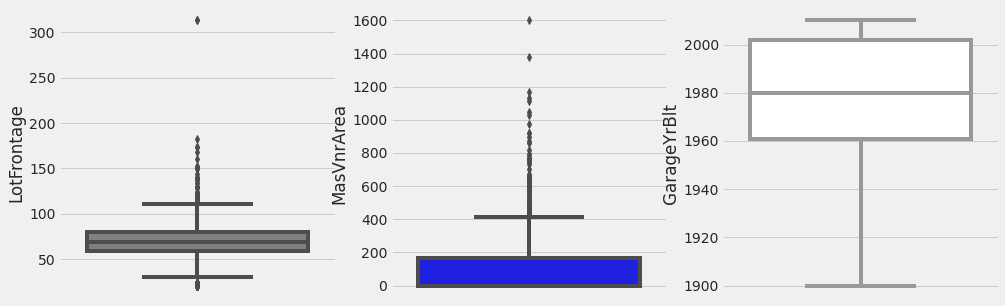

In [189]:

plt.figure(figsize=(15,5))

feat_check = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = x_train[feat_check]
colors=['','grey','blue','white']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

In [190]:
#filling the missing values with median
for col in feat_check:
    x_train[col].fillna(x_train[col].median(),inplace=True)
for col in feat_check:
    x_test[col].fillna(x_test[col].median(),inplace=True)

In [191]:

x_train[feat_check].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [192]:
x_test[feat_check].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

# Imputation of categorical features 

In [193]:
cat_missing = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
'GarageQual','GarageCond','BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType', 'Electrical']

# PoolQC,MiscFeature,Alley and Fence contains more than 1k missing values 


<AxesSubplot:ylabel='PoolQC'>

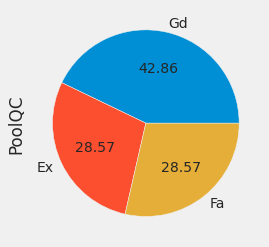

In [194]:
x_train['PoolQC'].value_counts().plot(kind='pie', autopct='%.2f')

 According to the dataset description : NA in PoolQC means No Pool available

In [195]:
x_train['PoolQC'] = x_train['PoolQC'].fillna('NA')
x_test['PoolQC'] = x_test['PoolQC'].fillna('NA')

In [240]:
x_train['PoolQC'].value_counts()

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

<AxesSubplot:ylabel='MiscFeature'>

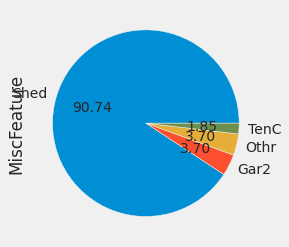

In [197]:
x_train['MiscFeature'].value_counts().plot(kind='pie', autopct='%.2f')

 According to the dataset description : NA in MiscFeature means No Miscellaneous feature available


In [198]:
x_train['MiscFeature'] = x_train['MiscFeature'].fillna('NA')
x_test['MiscFeature'] = x_test['MiscFeature'].fillna('NA')

In [199]:
x_train['MiscFeature'].value_counts()

NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

<AxesSubplot:ylabel='Alley'>

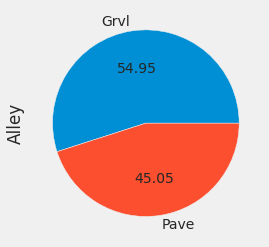

In [200]:
x_train['Alley'].value_counts().plot(kind='pie', autopct='%.2f')

According to the dataset description : NA in Alley means No Alley access

In [201]:
x_train['Alley'] = x_train['Alley'].fillna('NA')
x_test['Alley'] = x_test['Alley'].fillna('NA')

In [202]:
x_train['Alley'].value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

<AxesSubplot:ylabel='Fence'>

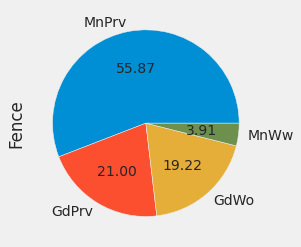

In [203]:
x_train['Fence'].value_counts().plot(kind='pie', autopct='%.2f')


According to the dataset description : NA in Fence means No Fence available

In [204]:
x_train['Fence'] = x_train['Fence'].fillna('NA')
x_test['Fence'] = x_test['Fence'].fillna('NA')


In [205]:
x_train['Fence'].value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [206]:
x_train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

According to the dataset description : NA means no fireplace available


In [207]:
x_train['FireplaceQu'] = x_train['FireplaceQu'].fillna('NotAvailable')
x_test['FireplaceQu'] = x_test['FireplaceQu'].fillna('NotAvailable')

<AxesSubplot:ylabel='FireplaceQu'>

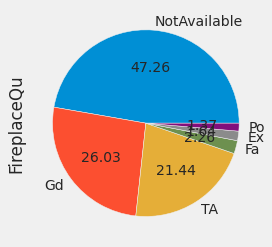

In [208]:
x_train['FireplaceQu'].value_counts().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='GarageType'>

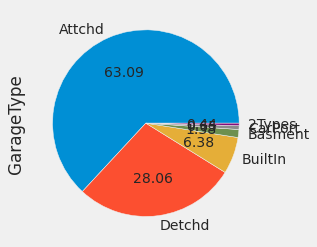

In [209]:
x_train['GarageType'].value_counts().plot(kind='pie', autopct='%.2f')

 According to the dataset description : NA in GarageType, GarageFinish, GarageQual and GarageCond means no Garage available

In [210]:
fill_garage = ['GarageType','GarageFinish','GarageQual','GarageCond']

for i in fill_garage : 
    x_train[i] = x_train[i].fillna('No_Garg')
    x_test[i] = x_test[i].fillna('No_Garg')

In [211]:
x_train[fill_garage].isna().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [212]:
x_test[fill_garage].isna().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

<AxesSubplot:ylabel='BsmtQual'>

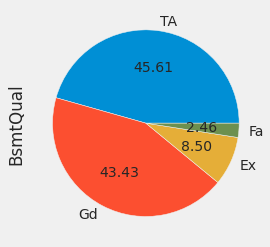

In [213]:
x_train['BsmtQual'].value_counts().plot(kind='pie', autopct='%.2f')


 According to the dataset description : NA in BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond and BsmtQual means no Basement available

In [214]:
fill_Bsmt = ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']

for i in fill_Bsmt : 
    x_train[i] = x_train[i].fillna('No_Bsmt')
    x_test[i] = x_test[i].fillna('No_Bsmt')

In [215]:
x_train[fill_Bsmt].isna().sum()

BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
dtype: int64

In [216]:
x_test[fill_Bsmt].isna().sum()

BsmtFinType2    0
BsmtExposure    0
BsmtFinType1    0
BsmtCond        0
BsmtQual        0
dtype: int64

<AxesSubplot:ylabel='MasVnrType'>

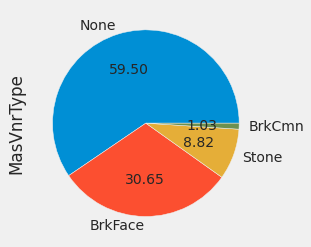

In [217]:
x_train['MasVnrType'].value_counts().plot(kind='pie', autopct='%.2f')


In [218]:
x_train[x_train['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

MasVnrType  MasVnrArea
234         NaN         0.0
529         NaN         0.0
650         NaN         0.0
936         NaN         0.0
973         NaN         0.0
977         NaN         0.0
1243        NaN         0.0
1278        NaN         0.0

samples with nan value for MasVnrType, have 0 MasVnrArea 
===> No Masonry veneer area 

In [219]:
x_train['MasVnrType'] = x_train['MasVnrType'].fillna('None')
x_test['MasVnrType'] = x_test['MasVnrType'].fillna('None')

<AxesSubplot:ylabel='Electrical'>

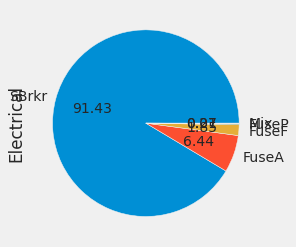

In [220]:
x_train['Electrical'].value_counts().plot(kind='pie', autopct='%.2f')


No information available about non values in Electrical feature in dataset description
Since it is cateogrical feature ==> fill them with most frequent value

In [221]:
x_train['Electrical'].fillna('SBrkr',inplace=True)
x_test['Electrical'].fillna('SBrkr',inplace=True)

In [222]:
#check if there any missing values left 

x_train.isna().sum().sum()

0

In [223]:
x_test.isna().sum().sum()

22

Stilll some missing values left in test dataset

In [224]:
missing_val(x_test)

In [225]:
miss_test = ['MSZoning', 'Utilities','BsmtFullBath','BsmtHalfBath','Functional','Exterior1st','Exterior2nd', 'BsmtFinSF1',
'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','KitchenQual','GarageCars','GarageArea','SaleType']
x_test[miss_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      1455 non-null   object 
 1   Utilities     1457 non-null   object 
 2   BsmtFullBath  1457 non-null   float64
 3   BsmtHalfBath  1457 non-null   float64
 4   Functional    1457 non-null   object 
 5   Exterior1st   1458 non-null   object 
 6   Exterior2nd   1458 non-null   object 
 7   BsmtFinSF1    1458 non-null   float64
 8   BsmtFinSF2    1458 non-null   float64
 9   BsmtUnfSF     1458 non-null   float64
 10  TotalBsmtSF   1458 non-null   float64
 11  KitchenQual   1458 non-null   object 
 12  GarageCars    1458 non-null   float64
 13  GarageArea    1458 non-null   float64
 14  SaleType      1458 non-null   object 
dtypes: float64(8), object(7)
memory usage: 171.1+ KB


In [226]:
categorical = [i for i in miss_test if x_test[i].dtype=='O']
categorical

['MSZoning',
 'Utilities',
 'Functional',
 'Exterior1st',
 'Exterior2nd',
 'KitchenQual',
 'SaleType']

No information available about nan values in these features 

==> fill them with most frequent value

In [227]:
for i in categorical:
    x_test[i] = x_test[i].fillna(x_test[i].mode()[0])

In [228]:
x_test[categorical].isna().sum()

MSZoning       0
Utilities      0
Functional     0
Exterior1st    0
Exterior2nd    0
KitchenQual    0
SaleType       0
dtype: int64

In [229]:
numerical = [i for i in miss_test if x_test[i].dtype!='O']
numerical

['BsmtFullBath',
 'BsmtHalfBath',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea']

In [230]:
for i in numerical:
    x_test[i] = x_test[i].fillna(x_test[i].median())

In [231]:
x_test[numerical].isna().sum()

BsmtFullBath    0
BsmtHalfBath    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
GarageCars      0
GarageArea      0
dtype: int64

In [232]:
x_test.isna().sum().sum()

0

In [233]:
x_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# The average  Sale price id 180921
# Sale price is between 34900 and 755000
# half of samples have a Sale price <= 163000

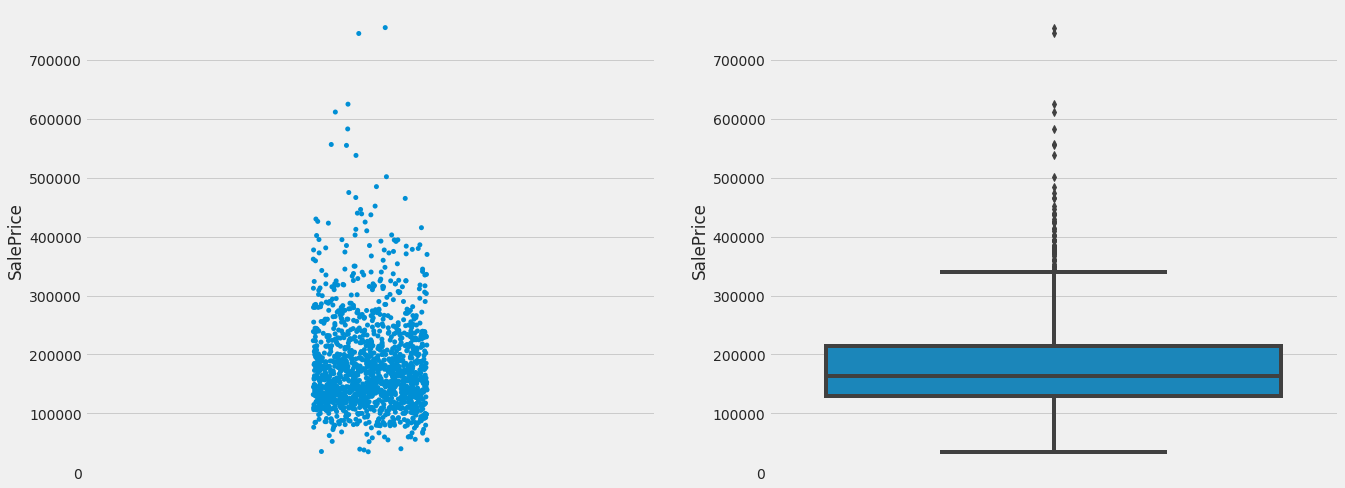

In [161]:



figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.stripplot(data=x_train,  y='SalePrice', ax = ax[0])
sns.boxplot(data=x_train,y='SalePrice', ax = ax[1])
plt.show()

In [162]:
    print('mean', np.round(np.mean(x_train['SalePrice']), 2))
    print('median', np.round(np.median(x_train['SalePrice']), 2))

mean 180921.2
median 163000.0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



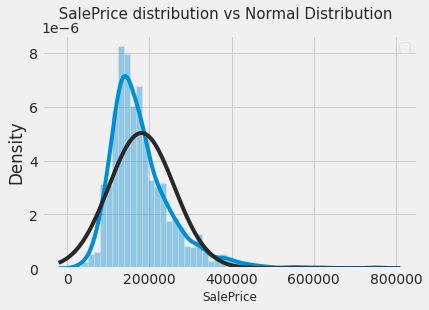

In [257]:
# Getting the main parameters of the Normal Ditribution ()
(mu, sigma) = norm.fit(x_train['SalePrice'])





plt.suptitle(" SalePrice distribution vs Normal Distribution", fontsize= 15)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])

sns.distplot(x_train['SalePrice'], kde = True, hist=True, fit = norm)
plt.show()

# The distribution does not seem to be normal, but highly right-skewed

 Skewness = 1.882876 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



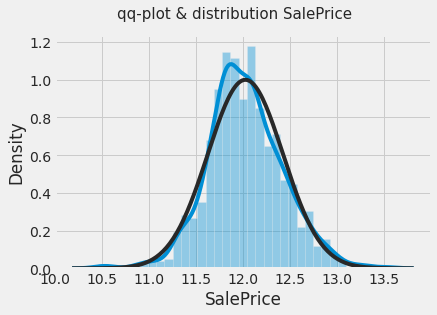

In [258]:
x_train2 = np.log1p(x_train['SalePrice'])

plt.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sns.distplot(x_train2, kde = True, hist=True, fit = norm)
plt.show()

# Log of SalePrice resembles a normal distribution


In [165]:
x_train2.skew()

0.12134661989685333

In [234]:
cat_summary = x_train.describe(include=[object]).transpose()
categorical_columns = cat_summary.index.tolist()
numerical_columns = x_train.select_dtypes(include=[np.number]).drop(columns=['SalePrice']).columns.tolist()
uniqueValCount=x_train[numerical_columns].nunique()
numerical_discrete=uniqueValCount[uniqueValCount<50].index.tolist()
date_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
discrete_columns = [col for col in numerical_discrete if col not in date_columns]
continuous_columns = [col for col in numerical_columns if col not in discrete_columns+date_columns]

In [167]:
def plot_bar(df, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 6.7, rows * 3.75))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1,)
            df.groupby(columns[i]).size().plot(
                kind="bar",
            )
            
            i += 1
            plt.tight_layout() 

# plotting box
def plot_box(df, y, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 5.5, rows * 3.5))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1)
            sns.boxplot(x=columns[i], y=y, data=df)

            i += 1
            plt.tight_layout() 
# plotting strip plot
       
def strip_plot(df, y, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 5.5, rows * 3.5))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1)
            sns.stripplot(x=columns[i], y=y, data=df)

            i += 1
            plt.tight_layout() 
# plotting hist
def plot_hist(df, columns):
    cols = 3
    rows = len(columns) // 3 + 1

    plt.figure(figsize=(cols * 5.5, rows * 3.5))
    i = 0
    for row in range(rows):
        for col in range(cols):
            index = cols * row + col
            if index >= len(columns):
                break
            plt.subplot(rows, cols, index + 1)
            df[columns[i]].hist(bins=50)
            plt.ylabel(columns[i])

            i += 1
            plt.tight_layout() 




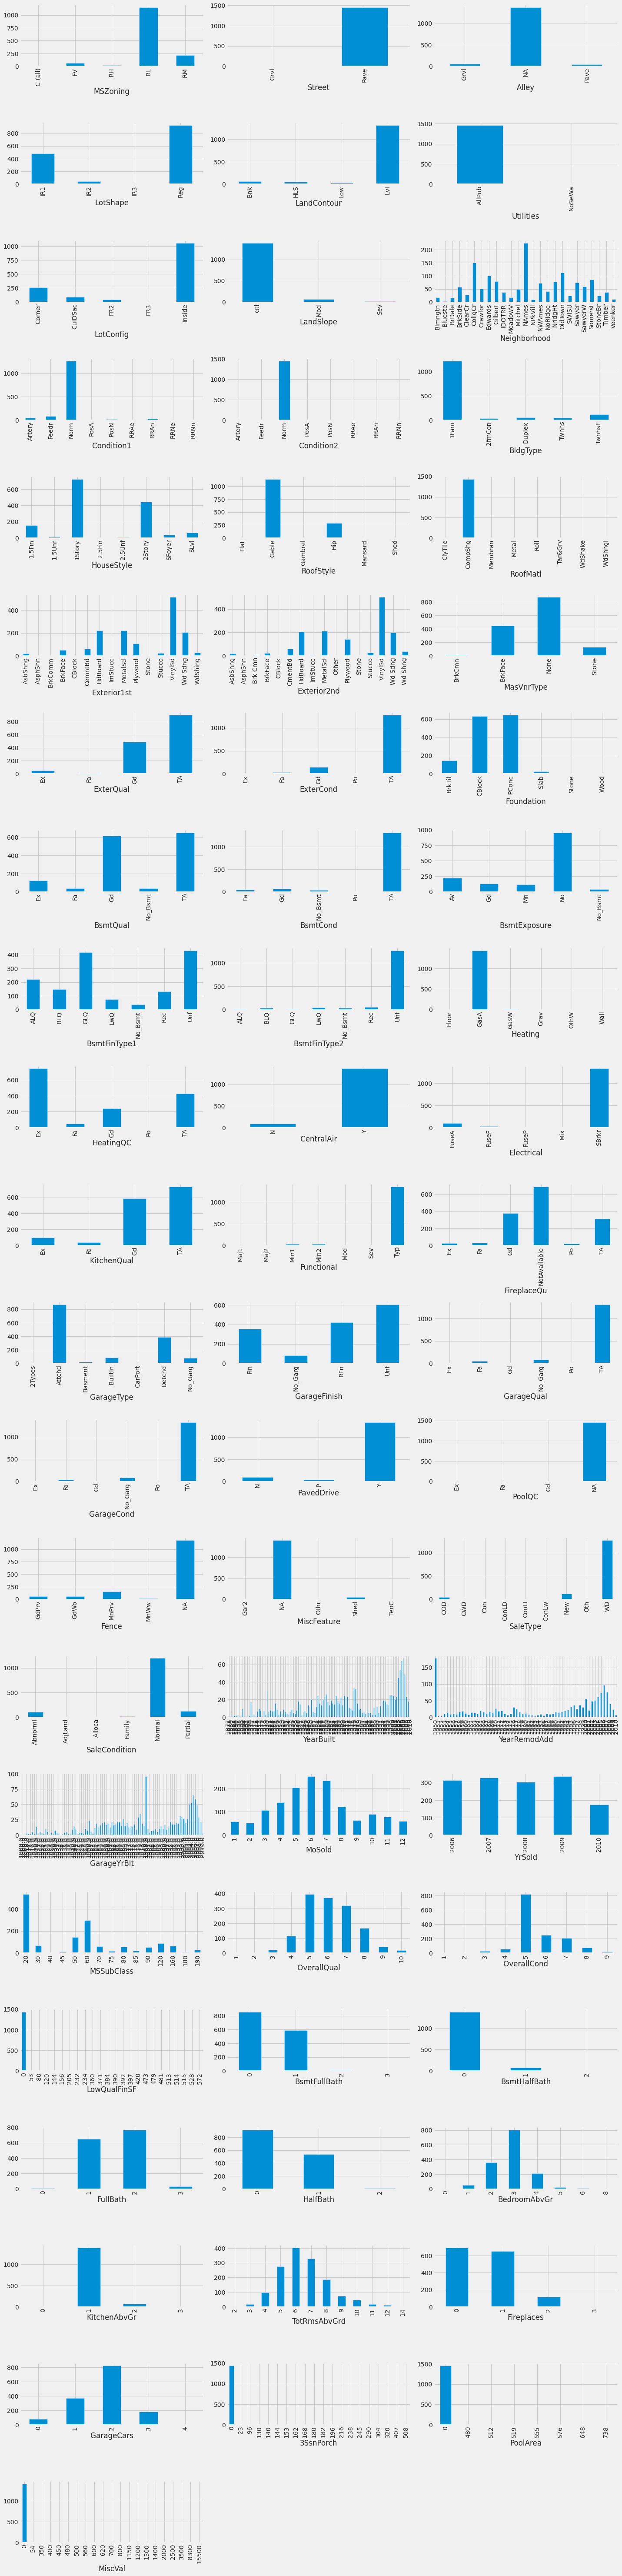

In [168]:
plot_bar(x_train,categorical_columns+date_columns+discrete_columns)

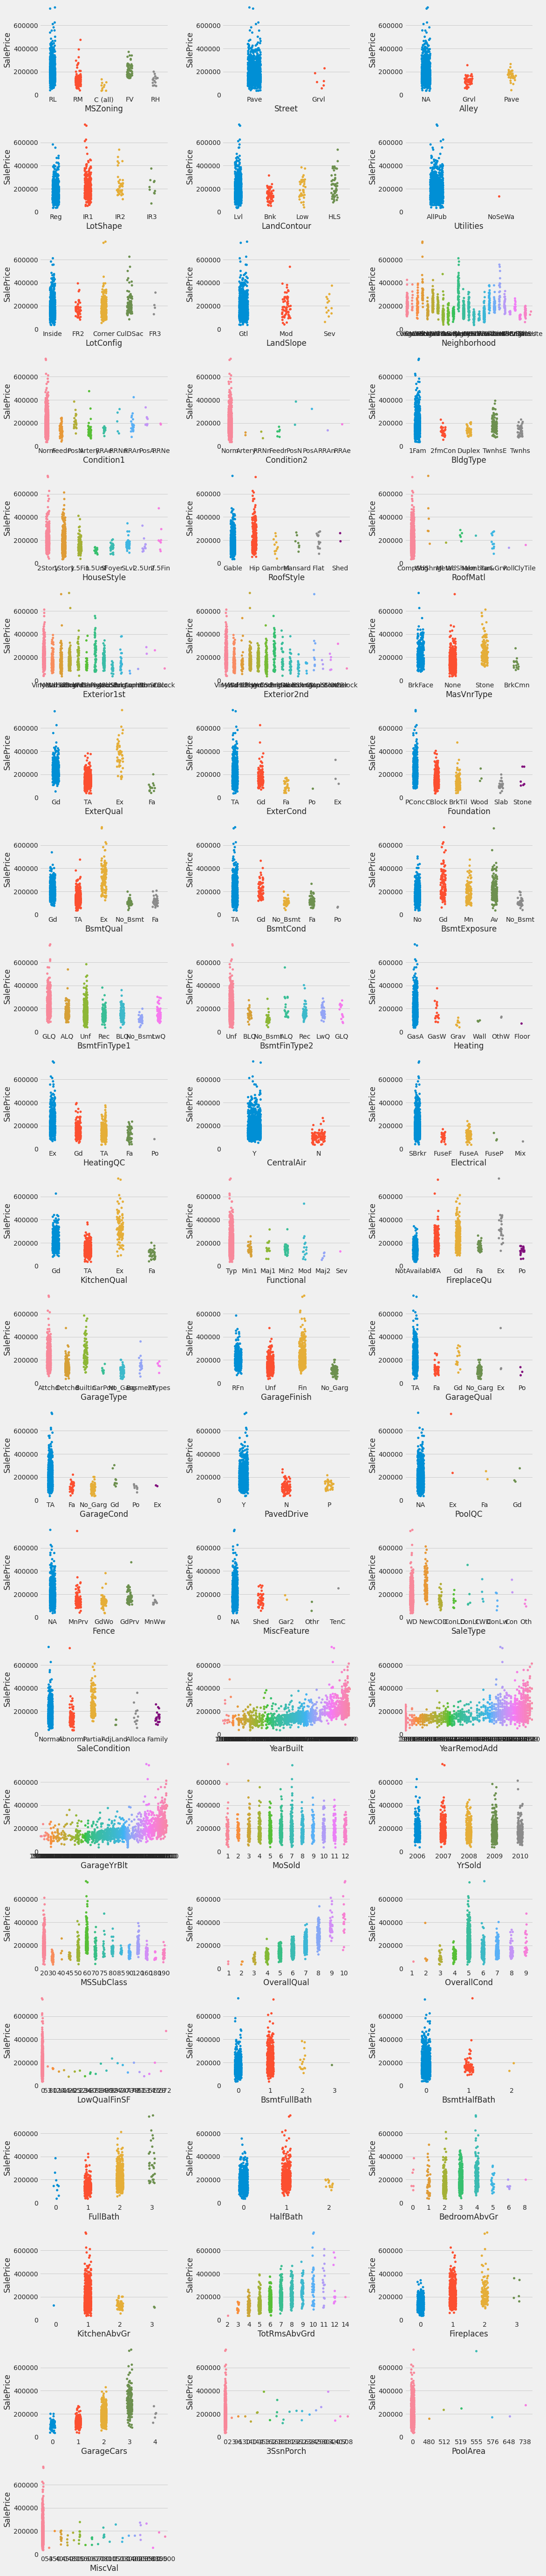

In [169]:
strip_plot(x_train,'SalePrice',categorical_columns+date_columns+discrete_columns)

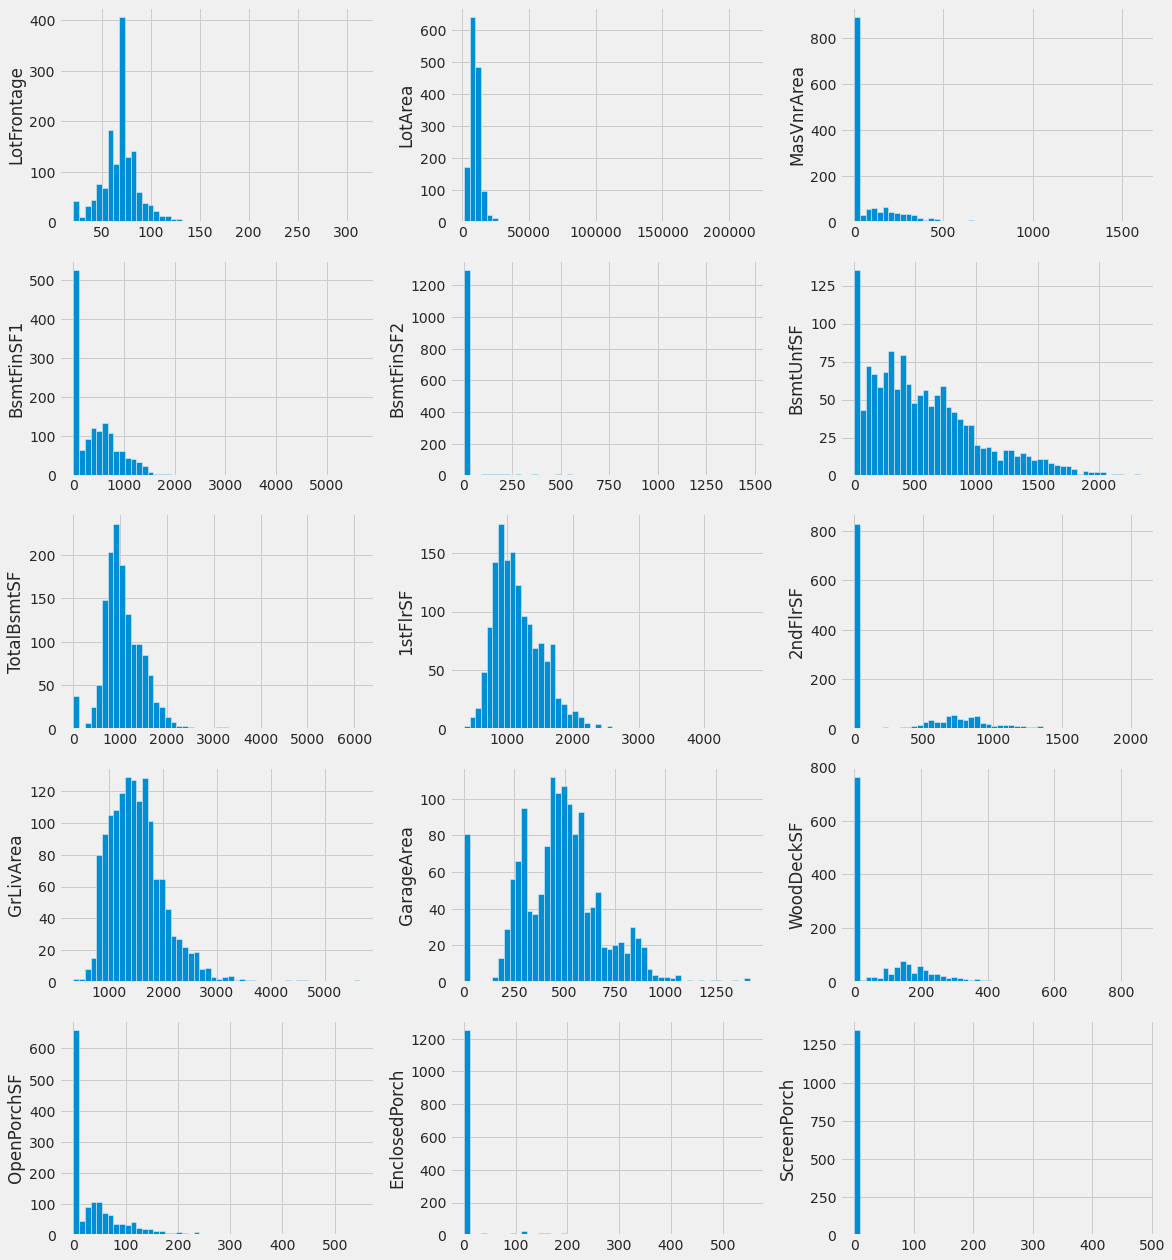

In [71]:
plot_hist(x_train,continuous_columns)


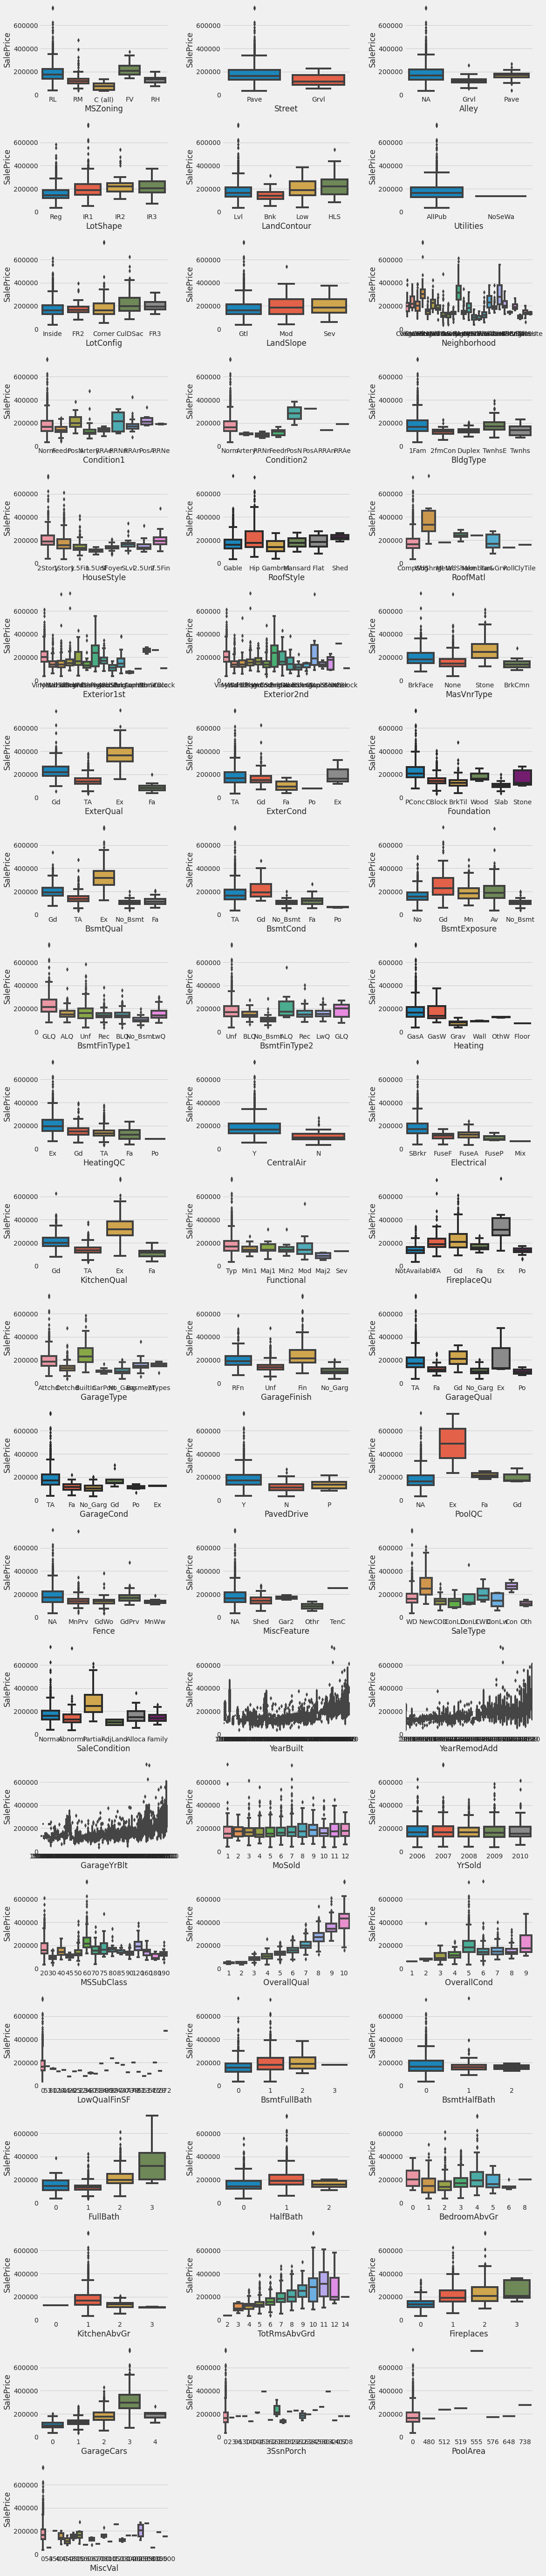

In [72]:
plot_box(x_train,'SalePrice',categorical_columns+date_columns+discrete_columns)


Street, Utilities,PoolQC,Poolarea not corr with saleprice since one value is the dominante value 

Pool in house doesn't increase price 
centralair in house increase price 
House's price increase with TotRmsAbvGrd,fullbath,overallqual,
garageCars,YearBUilt, GarageYrBlt,YearRemodadd


YrSold, moSold doesn't increase price

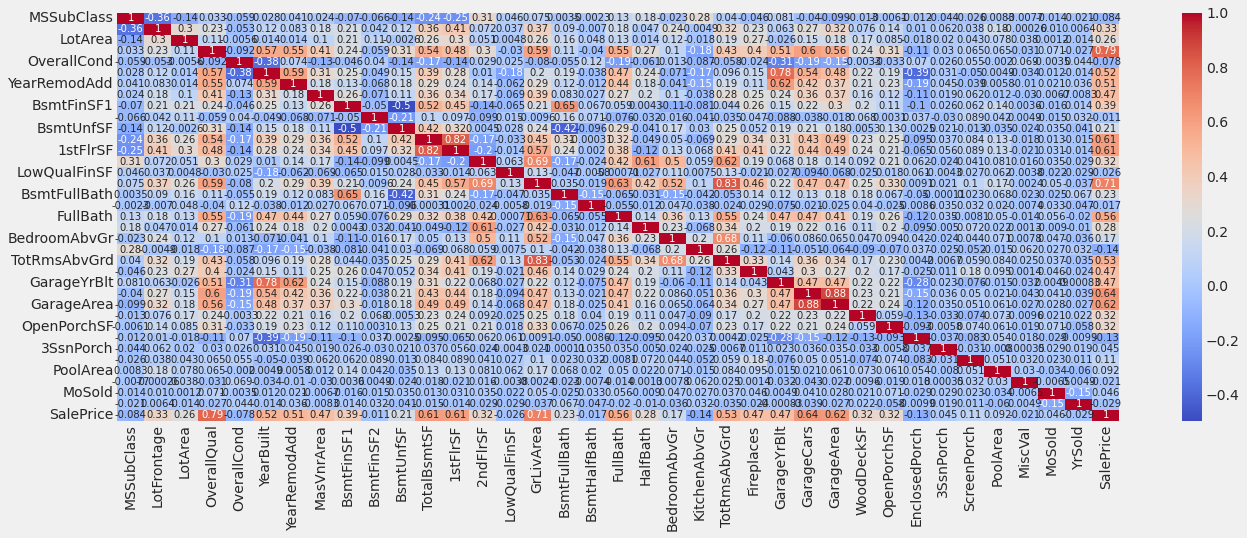

In [170]:
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(x_train[numerical_columns+['SalePrice']].corr(), cmap='coolwarm', annot=True, annot_kws={'size':10}, )
plt.show()

overallqual/grlivarea/garagecars/garagearea high correlation with target

enclosedporch kitchenabvgr low negative correlation with target 

 



<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

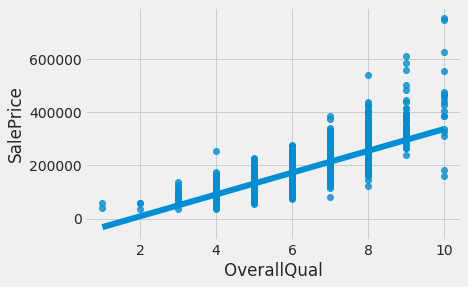

In [74]:
sns.regplot(x='OverallQual', y='SalePrice', data=x_train, robust=True)


it seems, there is a linear relationship between OverallQual and SalePrice


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

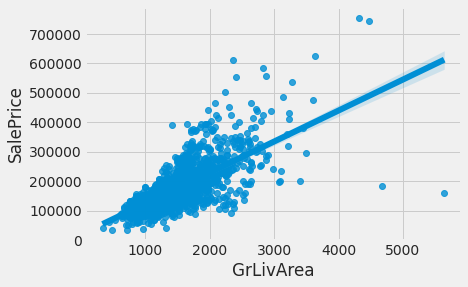

In [75]:
sns.regplot(x='GrLivArea', y='SalePrice', data=x_train, robust=True)


it seems, there is a linear relationship between grlivarea and SalePrice


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

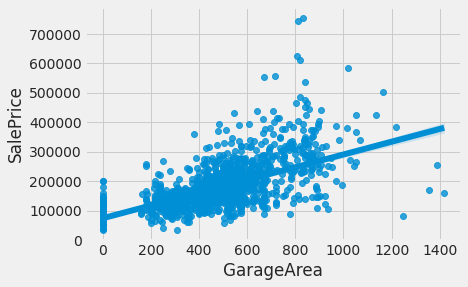

In [76]:
sns.regplot(x='GarageArea', y='SalePrice', data=x_train, robust=True)


<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

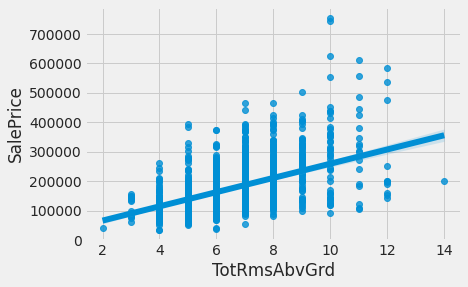

In [77]:
sns.regplot(x='TotRmsAbvGrd', y='SalePrice', data=x_train, robust=True)



<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

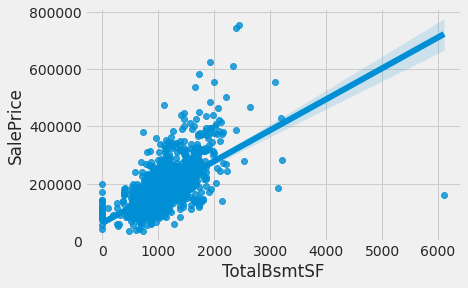

In [78]:
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=x_train, robust=True)


In [79]:
correlations=x_train.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs.style.background_gradient(axis=0)

In [171]:
continuous_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

# Selection from continuous features

In [241]:
X = x_train.copy()
X_test = x_test.copy()
y = X.pop("SalePrice")

In [242]:
X["LivLotRatio"] = X.GrLivArea / (X.LotArea + 1) 
X_test["LivLotRatio"] = X_test.GrLivArea / (X.LotArea + 1)
X["Spaciousness"] = (X["1stFlrSF"] + X["2ndFlrSF"]) / (X.TotRmsAbvGrd+1)
X_test["Spaciousness"] = (X_test["1stFlrSF"] + X_test["2ndFlrSF"]) / (X_test.TotRmsAbvGrd +1)
X["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")
X_test["MedNhbdArea"] = X_test.groupby("Neighborhood")["GrLivArea"].transform("median")
X["PorchTypes"] = X[[
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
    ]].gt(0.0).sum(axis=1)
X_test["PorchTypes"] = X_test[[
        "WoodDeckSF",
        "OpenPorchSF",
        "EnclosedPorch",
        "3SsnPorch",
        "ScreenPorch",
    ]].gt(0.0).sum(axis=1)

In [243]:
continuous_columns=continuous_columns+['LivLotRatio','Spaciousness','MedNhbdArea']

In [246]:
corr_mat = X[continuous_columns].join(y).corr()
selected_continuous_columns = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])>=0.5].index.tolist()
nonselected_continuous_columns = corr_mat['SalePrice'][abs(corr_mat['SalePrice'])<0.5].index.tolist()
selected_continuous_columns

['TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageArea',
 'Spaciousness',
 'MedNhbdArea',
 'SalePrice']

# Selection from rest of features

In [247]:
         
def calculateAnova(inpData,y, catCols, target):
    inpData = inpData.join(y)
    from scipy.stats import f_oneway
    CatColumnList = []
    for cat in catCols:
        CatGroupList = inpData.groupby(cat)[target].apply(list)
        anova = f_oneway(*CatGroupList)
        if(anova[1]<0.05):
            print('The column ', cat, ' is correlated with ', target, ' | P-Value: ',anova[1])
            CatColumnList.append(cat)
        else:
            print('The column ', cat , ' is NOT correlated with ', target, ' | P-Value: ',anova[1])
    
    return(CatColumnList)

In [248]:
selected_categorical_cols = calculateAnova(X,y,categorical_columns+ nonselected_continuous_columns  +date_columns+discrete_columns,'SalePrice')
selected_categorical_cols

The column  MSZoning  is correlated with  SalePrice  | P-Value:  8.817633866272648e-35
The column  Street  is NOT correlated with  SalePrice  | P-Value:  0.11704860406782483
The column  Alley  is correlated with  SalePrice  | P-Value:  2.9963796805460783e-07
The column  LotShape  is correlated with  SalePrice  | P-Value:  6.447523852011766e-25
The column  LandContour  is correlated with  SalePrice  | P-Value:  2.7422167521379096e-08
The column  Utilities  is NOT correlated with  SalePrice  | P-Value:  0.5847167739689381
The column  LotConfig  is correlated with  SalePrice  | P-Value:  3.163167473604189e-06
The column  LandSlope  is NOT correlated with  SalePrice  | P-Value:  0.1413963584114019
The column  Neighborhood  is correlated with  SalePrice  | P-Value:  1.5586002827707996e-225
The column  Condition1  is correlated with  SalePrice  | P-Value:  8.904549416138853e-08
The column  Condition2  is correlated with  SalePrice  | P-Value:  0.043425658360948464
The column  BldgType  is co

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'LivLotRatio',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea']

In [250]:
selected_col = [col for col in X.columns \
 if col in selected_continuous_columns + selected_categorical_cols]
X = X[selected_col].copy()
X_test = X_test[selected_col].copy()

In [251]:
correlations=X.corr()
attrs = correlations.iloc[:-1,:-1] # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs.style.background_gradient(axis=0)

In [252]:
X.drop(["GarageCars", "GarageYrBlt","TotRmsAbvGrd"], axis=1, inplace=True)
X_test.drop(["GarageCars", "GarageYrBlt","TotRmsAbvGrd"], axis=1, inplace=True)

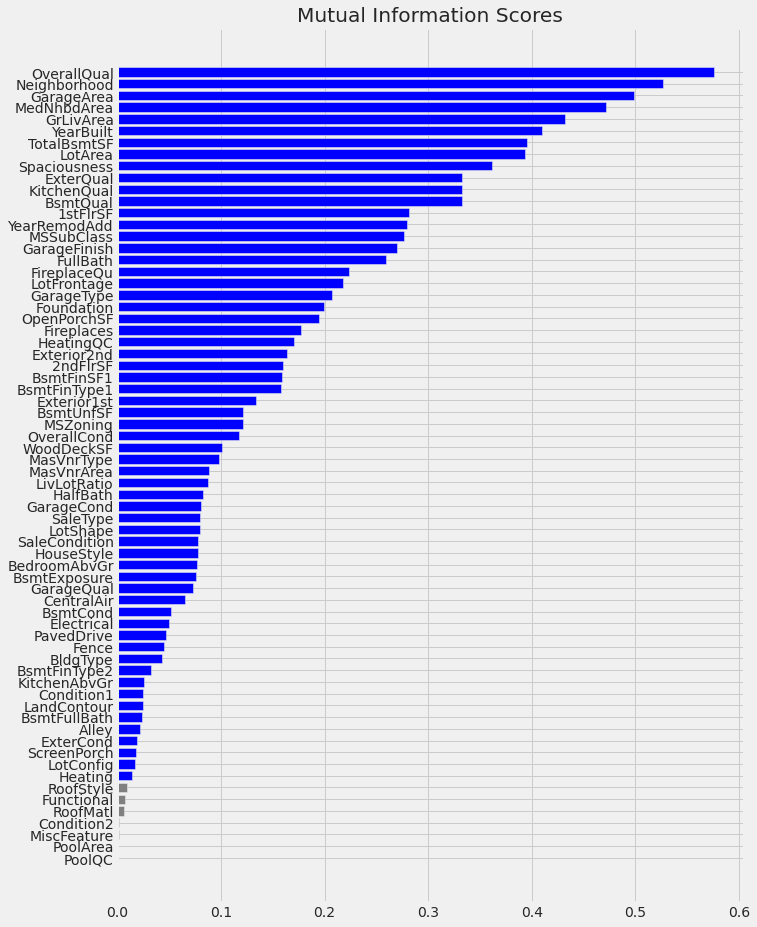

In [254]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    '''Estimate mutual information for a continuous target variable.'''
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X, y)
mi_scores.head()
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(10,15))
    clrs = ['grey' if (x < 0.01) else 'blue' for x in scores ]
    plt.barh(width, scores, color=clrs)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plot_mi_scores(mi_scores)

In [87]:
skewed_features  = x_train[continuous_columns+date_columns+discrete_columns].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewed_features = skewed_features[skewed_features > 0.5]
skewed_features

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
dtype: float64

In [255]:
# skew_index = skewed_features.index
# for i in skew_index:
#     x_train[i] = np.log1p(x_train[i])
#     x_test[i] = np.log1p(x_test[i])

In [80]:

# from sklearn.feature_selection import SelectKBest, f_regression
# x_train2 = x_train.drop(['SalePrice'], axis=1)
# select_reg =  SelectKBest(k=30, score_func=f_regression)
# select_reg.fit(x_train2, y_train)               
# X_train_housing_new = select_reg.transform(x_train2)
# X_train_housing_new.shape

In [81]:
# kept_features = pd.DataFrame({'columns': x_train2.columns,
#                               'Kept': select_reg.get_support()})
# kept_features[kept_features['Kept']==True]

In [82]:
# new_x_train = x_train2.iloc[:,select_reg.get_support()]
# new_x_train

In [83]:
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression
# from matplotlib import pyplot

# model = LinearRegression()
# # fit the model
# model.fit(new_x_train, y_train)
# # get importance
# importance = model.coef_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()